In [ ]:
## 01 - Predicting claim amount lab
### *** WORK in PROGRESS *** ###

In [ ]:
## 01 - Problem (case study)

In [ ]:
## 02 - Getting Data

In [5]:
import sys

In [8]:
!{sys.executable} -m pip install pandas

     |████████████████████████████████| 10.7 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 16.1 MB 17.7 MB/s eta 0:00:01


In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
## %matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
!{sys.executable} -m pip install matplotlib

     |████████████████████████████████| 7.2 MB 642 kB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.5 MB/s  eta 0:00:01


In [11]:
!{sys.executable} -m pip install seaborn

     |████████████████████████████████| 285 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 49.2 MB/s eta 0:00:01


In [18]:
data=pd.read_csv('clean_marketing.csv')

In [19]:
data.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [ ]:
## 03 - Cleaning/Wrangling/EDA
## Change headers names. Deal with NaN values, replace with appropriate method.
## split categorical Features and Numerical Features.
## Explore visually both sets of features, to identify next steps.
## Look at potential multicollinearity using a correlation matrix or other approach.

In [21]:
data.shape

(9134, 26)

In [16]:
pwd

"/Users/nayo/Desktop/Ironhack/Nayo's_Labs/2 - Customer Analysis Case Study"

In [29]:
!{sys.executable} -m pip install sklearn

     |████████████████████████████████| 7.3 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 32.6 MB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [40]:
from sklearn.linear_model import LinearRegression

In [4]:
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
## split categorical Features and Numerical Features.
data_num=data.select_dtypes(include=np.number)

NameError: name 'data' is not defined

In [6]:
data.head()

NameError: name 'data' is not defined

In [42]:
data_num.head(30)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,3,7645.861827,0,106,18,65,0,7,529.881344,1
4,4,2813.692575,43836,73,12,44,0,1,138.130879,2
5,5,8256.297800,62902,69,14,94,0,2,159.383042,1
6,6,5380.898636,55350,67,0,13,0,9,321.600000,2
7,7,7216.100311,0,101,0,68,0,4,363.029680,1
8,8,24127.504020,14072,71,13,3,0,2,511.200000,1
9,9,7388.178085,28812,93,17,7,0,8,425.527834,2


In [24]:
data_num.shape

(9134, 10)

In [45]:
correlations_matrix=data.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax= plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

NameError: name 'plt' is not defined

In [47]:
!{sys.executable} -m pip install matplotlib

In [49]:
import matplotlib.pyplot as plt

In [51]:
!{sys.executable} -m pip install seaborn

In [52]:
import seaborn as sns

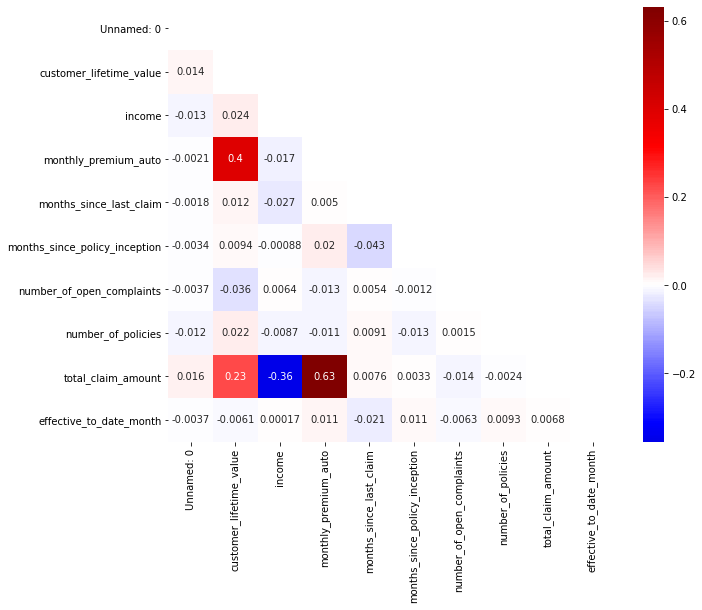

In [53]:
correlations_matrix=data.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax= plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

In [3]:
#define the y predictor variable 
y=data_num['total_claim_amount']

NameError: name 'data_num' is not defined

In [ ]:
## 04 - Pre-Processing Data
## Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.
## Encoding Categorical Data fields using OHE.
## Bring categorical and numerical columns back together using pd.concat.
## Define X and y, the y value you are seeking to predict is claim amount.
## Splitting into train set and test dataset using random state, eg 80%:20% 

In [ ]:
## 05 - Modeling
## Apply linear regression model from sklearn.linear_model.
## Fit over your train data and predict against X test.

In [ ]:
## 06 - Model Validation
##You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.

In [ ]:
## 07 - Reporting
## Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained.